# 作業四

1. 銜接作業三爬蟲抓到的資料表繼續進行探勘

2. 將非結構化資料做特徵提取

  a. 一般 jiebe 斷詞後取詞頻關鍵字

  b. 透過 LLM 取得摘要後再取關鍵

3. 將這些特徵用關聯圖畫出來



> 因作業三的做的是爬新上映電影的一些資訊，已經把內容整理得過於結構化，故重新爬一份PTT科技版的較新文章做分析。


LLM Model Test

In [15]:
!pip install transformers torch

In [16]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [17]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
#gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KMNDgk-4EPgkVIwT8fpaJZM01KHgTPFKkTe8PRS45IQ/edit?usp=sharing')
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1-fxqKIM4EvVQhTKKCbLcysARtSAfB2FsksOnzds5xOo/edit?usp=sharing')
# 從 gsheets 的工作表
sheets1 = gsheets.worksheet('processed').get_all_values()

df = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [18]:
df.head()

,title,author,date,content
0,[討論] 台塑要開始優退裁員 還值得待嗎？,csgod1325 (alex),Mon Oct 30 13:16:47 2023,作者csgod1325 (alex)看板Tech_Job標題[討論] 台塑要開始優退裁員 還...
1,[討論] 台達化頭份,banana321 (),Mon Oct 30 13:23:45 2023,作者banana321 ()看板Tech_Job標題[討論] 台達化頭份時間Mon Oct ...
2,[新聞] 根據財報顯示，AI協助科技巨人，利潤上,stpiknow (H),Mon Oct 30 18:02:06 2023,作者stpiknow (H)看板Tech_Job標題[新聞] 根據財報顯示，AI協助科技巨人...
3,[新聞] 台積電效應 熊本廠鄰近區域房租飆漲近4成,hvariables (Speculative Male),Mon Oct 30 19:42:42 2023,作者hvariables (Speculative Male)看板Tech_Job標題[新聞...
4,[公告]水桶,joh (30分滅一國的匈奴),Mon Oct 30 23:07:03 2023,作者joh (30分滅一國的匈奴)看板Tech_Job標題[公告]水桶時間Mon Oct 3...


In [19]:
import re
# 只保留中文字
def keep_chinese_chars(text):
    pattern = re.compile(r'[^\u4e00-\u9fff]')
    chinese_text = re.sub(pattern, '', text)
    chinese_text = chinese_text.replace("推推", "")
    return chinese_text

In [20]:
text = df['content'][0]
text = keep_chinese_chars(text)
text

'作者看板標題討論台塑要開始優退裁員還值得待嗎時間如題代幫朋友問朋友待台塑四寶台北集團的某單位最近被迫搬家已經搞的很不爽了今年以來被對岸石化產業殺價競爭估計未來幾年很難賺錢現在聽到內部啟動優退方案逼人離開不離開可以試看看公司不喜歡不聽話的資深人員同事原本是因為台北人父母也支持台塑幸福企業才待的但待還不到年已經開始萌生退意可能找同學內推三角鐵或肉鬆發展台塑這家公司還值得待嗎發信站批踢踢實業坊來自臺灣文章網址推歲可以退了啦推嘖嘖連台塑都這樣三角沒那麼好進啦五哥考慮看看同學四大的想內推看看正夯電車是未來趨勢還好吧歲又加發推好像有人說傳產比較穩推早說了做年抵傳產國營公職做年要錢選要爽度待公職台塑就是個不爽錢也不多的地方現在也無法待一輩子了推幾歲了可以的話趁年輕的話趕快跑同屆同學跟我一樣都編輯臺灣推還沒跳的動的就走吧推哎去瞭解人員合理化老一輩都聽過只是搭到中國順風車推哈哈哈可憐傳慘推這也能流出喔先被裁吧人事命令外流沒辦法擋吧手機拍照就出去了說個笑話傳慘很穩推四大電資去台塑虧大了吧噓而且這跟科技業有什麼關係台塑也有搞科技業部份例如大腸能但本質還是傳產推感覺超棒的推有存夠錢可以退了台灣所謂高科技製造業其實文化跟傳產其實沒啥差別都是台式管理笑死推政府再不限制外勞比例等著出大亂子不退的大概都要遣送麥寮了至於麥寮不退的還能怎麼對付推建議科學園區老鳥肥貓比照辦理麥寮叫你爬上爬下歲應該就受不了看你退不退推現在公職絕對沒大家想的那麼爽我就在裡面很多人不知道公職是責任制不看勞基法的國營會比較爽推國營職員好像也不是保勞保吧雇員才是勞保但雇員薪水前期很低中後期薪水也尚可而已能拿到的先調查清楚確定好不要踩個空又離職推台塑決策有很大的問題我待年多就受不了跑了推台灣的勞基法有很好嗎有沒有遵循有差嗎而且一堆公司沒在鳥也沒被怎樣推誰會工作到歲推台塑待遇其實可以了問題是文化非常不可以人家買的油比你便宜又好真的了推這聲明看起來超不妙欸推什麼叫連台塑也這樣台塑從古至今都是這樣噓台塑去年就發過優退公文了今年才上報推喔幫噓這種中國蓋一整排石化廠台塑不倒才怪還好有總部可玩都更炒房別怕改台塑建設公司即可噓俄羅斯直接拉油管到中國中俄經濟都差六成市價打死你噓位子清出來十年年資咖才有機會呀總算熬出頭了好嗎推老人都賺飽了吧沒差噓廢話你腳麻推所以你同事裡面待退年齡的比例高嗎推台塑化的朋友都說公司景氣很差了保重待了年朋友說的第一次聽

In [21]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def Mistral_summarize(text):

  device = "cuda" # the device to load the model onto

  model = AutoModelForCausalLM.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")
  tokenizer = AutoTokenizer.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")

  messages = [
      {"role": "user", "content": "What is your favourite condiment?"},
      {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
      {"role": "user", "content": {text}}
  ]

  encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

  model_inputs = encodeds.to(device)

  generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
  decoded = tokenizer.batch_decode(generated_ids)

  return decoded

In [22]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):

    keep_chinese_chars(text)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [23]:
summary = bart_summarize(text)
print(summary)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


作 者 看 板 標 題 討 論 台 塑 要 開 始 優 退 裁 員 還 值 得 待 嗎 時 間 如 題 代 幫 朋 友 問 朋 友 待 台 塑 四 寶 台 北 集 團 的 某 單 位 最 近 被 迫 搬 家 已 經 搞 的 很 不 爽 了 今 年 以 來 被 對 岸 石 化 產 業 殺 價 競 爭 估 計 未 來 幾 年 很 難 賺 錢 現 在 聽 到 內 部 啟 動 優 退 方 案 逼... 我 想 要 我 想 要 我 想 要 我 想 要 我 想 要 我 想 要 我 想 要 我 想 要 我


In [24]:
def remove_spaces(text):
    # 使用 replace 方法來刪除空格
    return text.replace(" ", "")

output_text = remove_spaces(summary)
output_text

'作者看板標題討論台塑要開始優退裁員還值得待嗎時間如題代幫朋友問朋友待台塑四寶台北集團的某單位最近被迫搬家已經搞的很不爽了今年以來被對岸石化產業殺價競爭估計未來幾年很難賺錢現在聽到內部啟動優退方案逼...我想要我想要我想要我想要我想要我想要我想要我想要我'

In [25]:
import jieba
import jieba.analyse

jieba.analyse.extract_tags(output_text, topK=10)

['想要', '台塑', '優退', '看板', '標題', '討論', '開始', '裁員還', '時間', '如題']

In [26]:
# 使用 jieba 提取關鍵字
def extract_keywords(text):
    #text = keep_chinese_chars(text)

    summary = bart_summarize(text)
    outputt_ext = remove_spaces(summary)

    return jieba.analyse.extract_tags(outputt_ext, topK=10)  # 提取前十個關鍵字

df['keywords'] = df['content'].apply(extract_keywords)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a m

In [27]:
df.head()

,title,author,date,content,keywords
0,[討論] 台塑要開始優退裁員 還值得待嗎？,csgod1325 (alex),Mon Oct 30 13:16:47 2023,作者csgod1325 (alex)看板Tech_Job標題[討論] 台塑要開始優退裁員 還...,"[台塑, 看板, csgod1325, alex, tech, job, 標題, 討論, 開..."
1,[討論] 台達化頭份,banana321 (),Mon Oct 30 13:23:45 2023,作者banana321 ()看板Tech_Job標題[討論] 台達化頭份時間Mon Oct ...,"[頭份, 台達化, 領班, 面試, 看板, 品管, 玻璃棉, banana321, tech..."
2,[新聞] 根據財報顯示，AI協助科技巨人，利潤上,stpiknow (H),Mon Oct 30 18:02:06 2023,作者stpiknow (H)看板Tech_Job標題[新聞] 根據財報顯示，AI協助科技巨人...,"[ai, 巨人, 根據, 財報, 顯示, 協助, 利潤, 科技, 看板, stpiknow]"
3,[新聞] 台積電效應 熊本廠鄰近區域房租飆漲近4成,hvariables (Speculative Male),Mon Oct 30 19:42:42 2023,作者hvariables (Speculative Male)看板Tech_Job標題[新聞...,"[42, mon, 時間, 熊本, 台積, 電效應, 廠鄰, 近區域, 飆漲, 30]"
4,[公告]水桶,joh (30分滅一國的匈奴),Mon Oct 30 23:07:03 2023,作者joh (30分滅一國的匈奴)看板Tech_Job標題[公告]水桶時間Mon Oct 3...,"[tech, job, 看板, joh, 30, 分滅, 一國, 標題, 時間, monoc..."


In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [29]:
G = nx.Graph()

for index, row in df.iterrows():
    author = row['author']
    keywords = row['keywords']

    G.add_node(author, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword)

In [30]:
keywords

['tsmc',
 '耗材',
 '看板',
 'waiting1995',
 'sunshine',
 'tech',
 'job',
 '標題',
 '請益',
 '對南科']

In [31]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-01 10:08:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.113, 142.250.141.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 10:08:06--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  78.7MB/s    in 0.3s    

2024-05-01 10:0

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


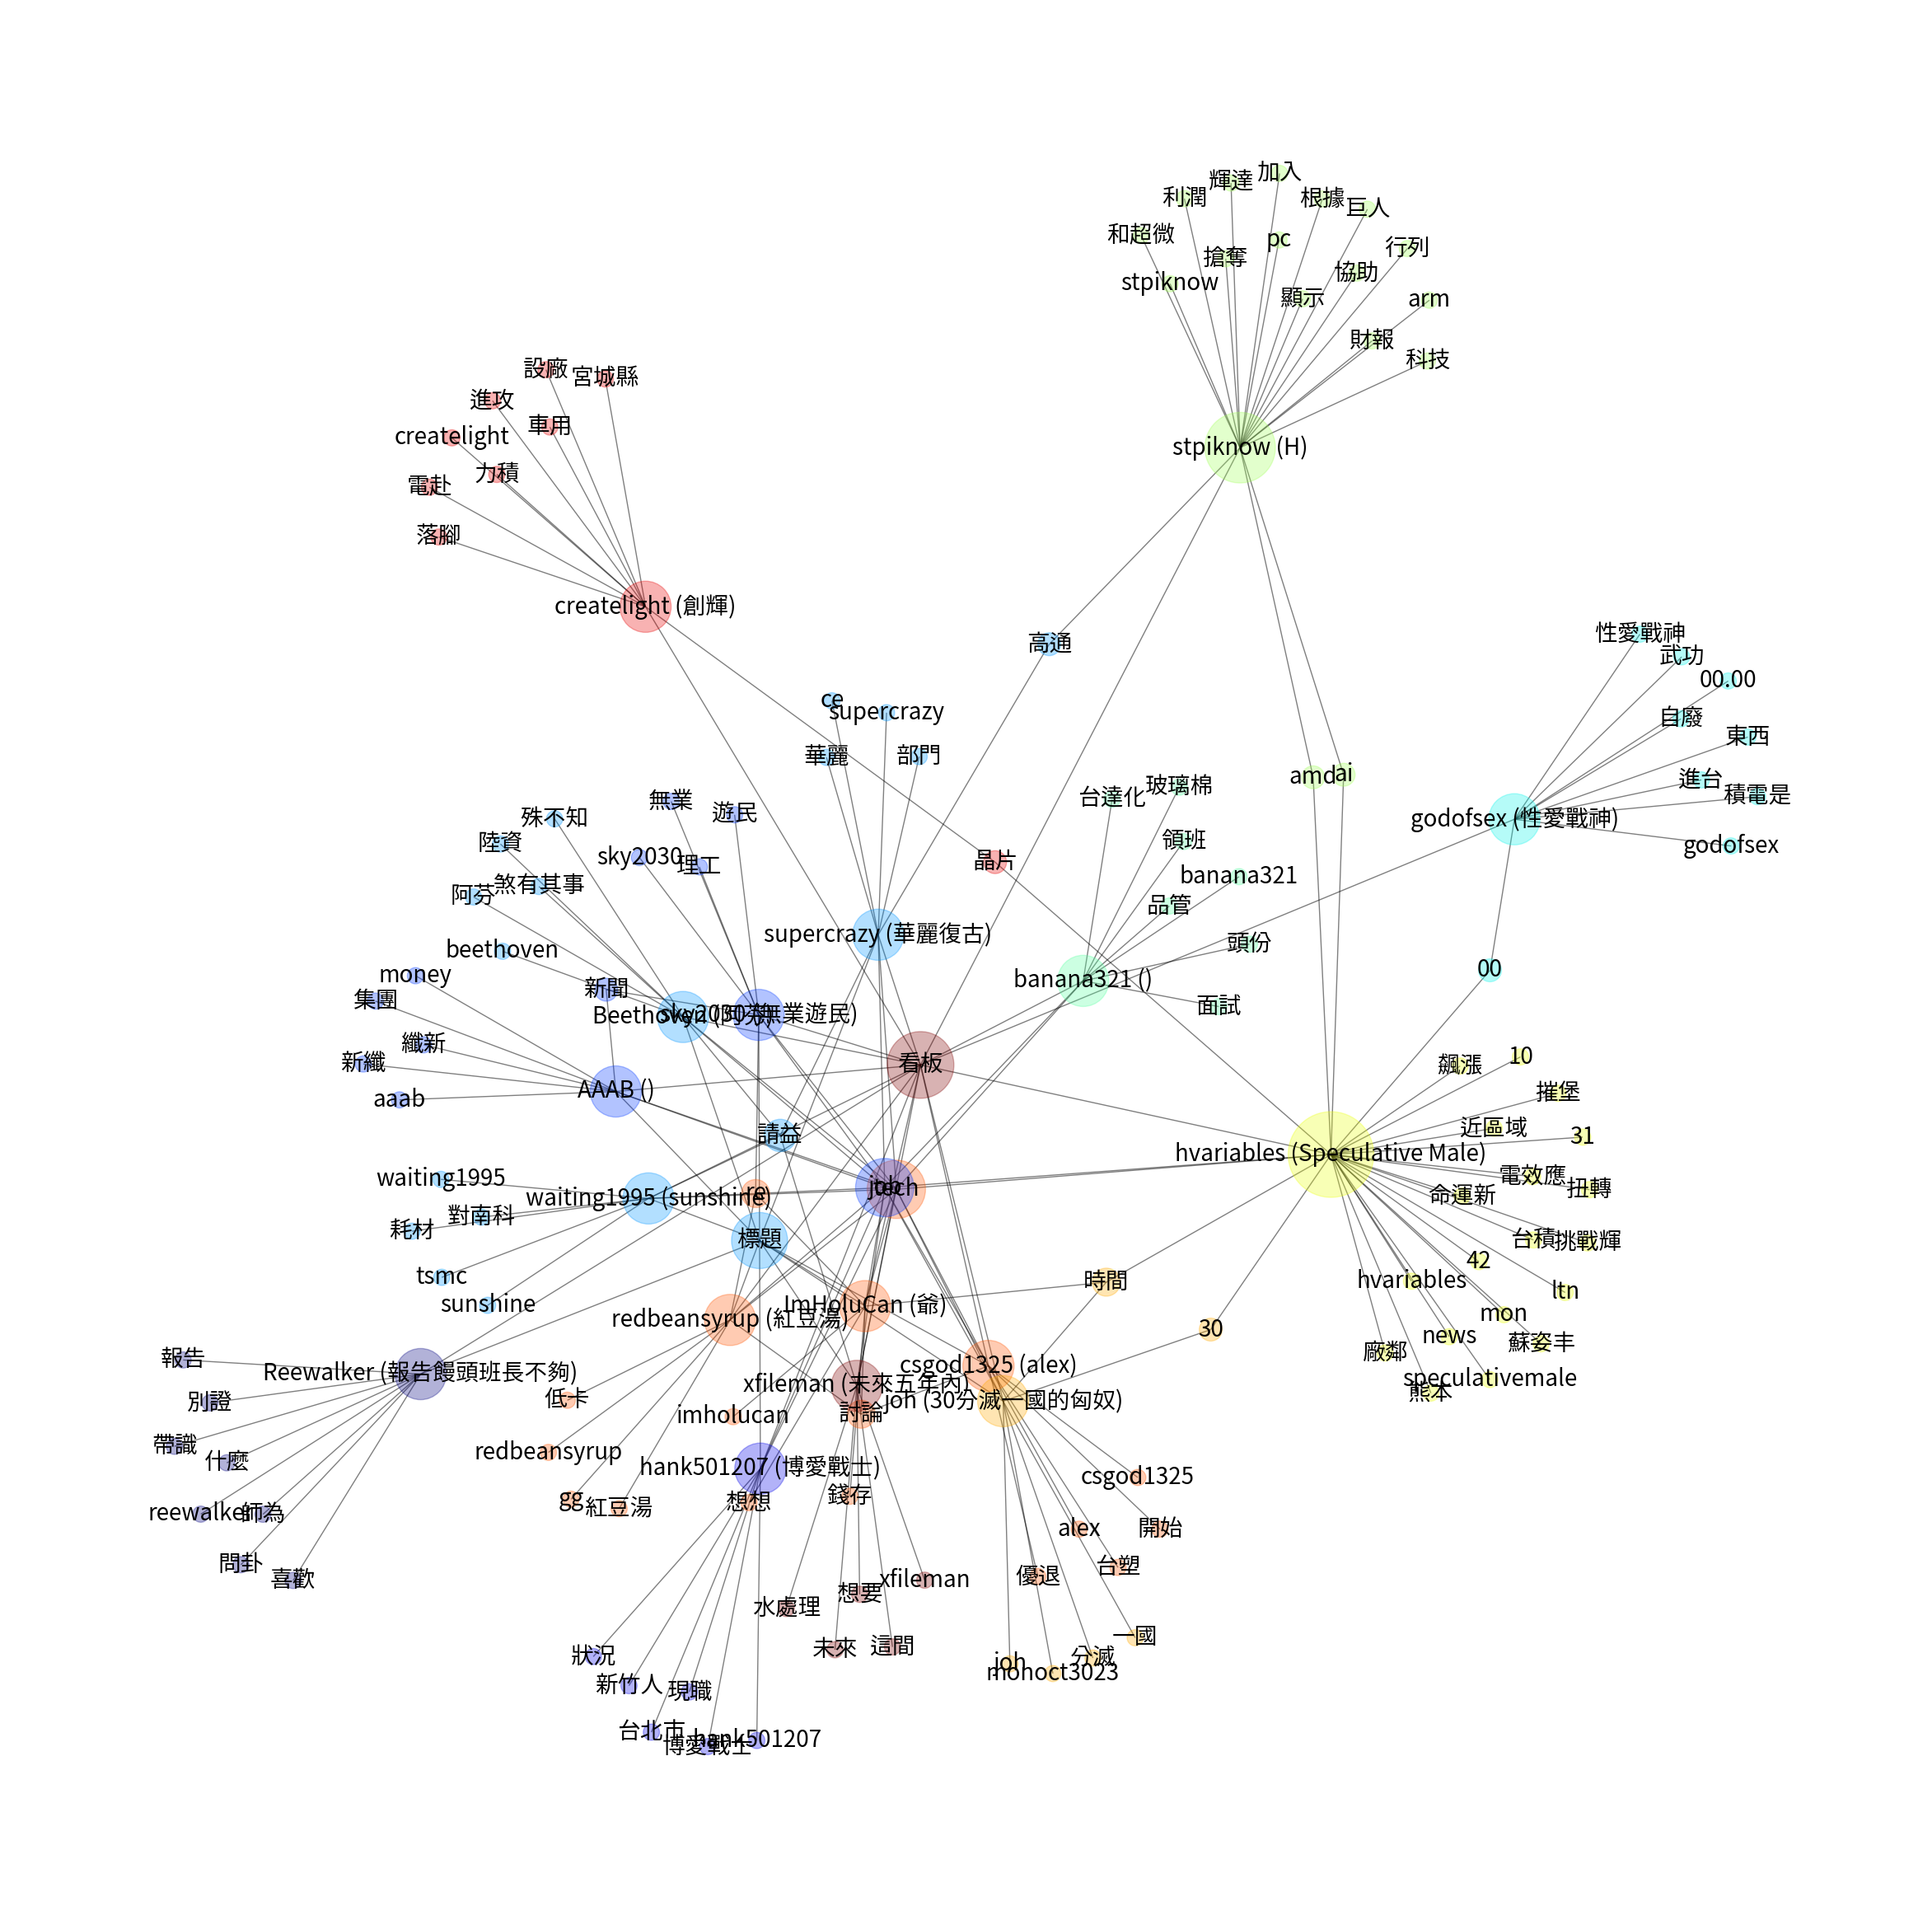

In [32]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()